<a href="https://colab.research.google.com/github/mobarakol/SurgicalVLM-Agent/blob/main/Demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Surgical LLM Agent Demo

# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Create output directories in Google Drive
import os
output_base_dir = '/content/drive/MyDrive/surgical_llm_demo'
model_dir = f'{output_base_dir}/models/r128'
data_dir = f'{output_base_dir}/datasets'
results_dir = f'{output_base_dir}/results'
metrics_dir = f'{output_base_dir}/metrics'

# Create directories if they don't exist
for directory in [output_base_dir, model_dir, data_dir, results_dir, metrics_dir]:
    os.makedirs(directory, exist_ok=True)

print(f"Created output directories in Google Drive at: {output_base_dir}")

# Install required packages
!pip install -q transformers==4.45.1 datasets==3.0.1 evaluate==0.4.3 gdown nltk torch==2.4.0 torchvision==0.19.0
!pip install -q huggingface_hub
!pip install -q bitsandbytes>=0.43.2
!pip install -q accelerate
!pip install rouge_score

# Download necessary NLTK data
import nltk
nltk.download('wordnet', quiet=True)
nltk.download('punkt', quiet=True)

# Download model weights using gdown (NOTE: Replace with your actual file ID)
print("Downloading model weights...")
MODEL_FILE_ID = "YOUR_MODEL_FILE_ID_HERE"  # Replace with the actual file ID from Google Drive

# Check if model is already downloaded
if not os.path.exists(f"{model_dir}/config.json"):
    !gdown --folder {MODEL_FILE_ID} -O {model_dir}
    print(f"Model weights downloaded to {model_dir}")
else:
    print(f"Model weights already exist at {model_dir}")

# Download datasets
print("Downloading datasets...")
DATASET_FILE_IDS = {
    "Surgical-VQA_V.csv": "1rjv3PzKHqz5BjJn8anR2jSwNTPS2k0Ak",
    "Overlaying_V.csv": "1gFpt8kjoc0kzTBXXiRlYgwDC-HzlSGAr",
    "Segment-MRI_V.csv": "1rSJfPEqg24fhk4MybqpRw652orLfgojc",
    "Segment-Video_V.csv": "1lo0xEKcJgMPy0T0AXfRIjNbrSdJyrXkR",
    "Detect-Instrument_V.csv": "1A4c5ieW6P_oqMnWRybl6NmtmTshsPX1n",
    "2model_V.csv": "1dl_81gH1o06ZYLn1FuL8J4INxq3cLqnu",
    "3model_V.csv": "1WwLigg0kjRHyxkOaSYc8V2M8GFK9qlc9"
}

# https://drive.google.com/file/d/1rjv3PzKHqz5BjJn8anR2jSwNTPS2k0Ak/view?usp=drive_link
# https://drive.google.com/file/d/1gFpt8kjoc0kzTBXXiRlYgwDC-HzlSGAr/view?usp=drive_link
# https://drive.google.com/file/d/1rSJfPEqg24fhk4MybqpRw652orLfgojc/view?usp=drive_link
# https://drive.google.com/file/d/1lo0xEKcJgMPy0T0AXfRIjNbrSdJyrXkR/view?usp=drive_link
# https://drive.google.com/file/d/1A4c5ieW6P_oqMnWRybl6NmtmTshsPX1n/view?usp=drive_link
# https://drive.google.com/file/d/1dl_81gH1o06ZYLn1FuL8J4INxq3cLqnu/view?usp=drive_link
# https://drive.google.com/file/d/1WwLigg0kjRHyxkOaSYc8V2M8GFK9qlc9/view?usp=drive_link

# Download each dataset
for filename, file_id in DATASET_FILE_IDS.items():
    if not os.path.exists(f"{data_dir}/{filename}"):
        !gdown {file_id} -O {data_dir}/{filename}
        print(f"Downloaded {filename}")
    else:
        print(f"{filename} already exists")

Mounted at /content/drive
Created output directories in Google Drive at: /content/drive/MyDrive/surgical_llm_demo
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.4/44.4 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 127.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 471.6/471.6 kB 41.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.0/84.0 kB 8.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 797.3/797.3 MB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 118.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 69.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 39.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 60.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━

# Define Fuctions

In [13]:
# Import required libraries
import torch
import pandas as pd
import re
import evaluate
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
from torch.utils.data import Dataset, DataLoader
from transformers import AutoTokenizer, AutoModelForCausalLM, BitsAndBytesConfig
from tqdm.notebook import tqdm
import nltk
from nltk.tokenize import word_tokenize
import numpy as np

warnings.filterwarnings("ignore", category=UserWarning)

# ---------------------------- Utility Functions ----------------------------

class TextQuestionLabelDataset(Dataset):
    def __init__(self, input_file):
        self.data = pd.read_csv(input_file)
        self.questions = self.data['Input'].tolist()
        self.labels = self.data['Label'].tolist()

    def __len__(self):
        return len(self.questions)

    def __getitem__(self, idx):
        return self.questions[idx], self.labels[idx]

def generate1_SM(que):
    sm = (
        "Select a model to answer the following question:\n"
        f"'{que}'\n"
        "Select a model only from the following model list: Segment-Video, Segment-MRI, "
        "Detect-Instrument, Overlaying, Visual-Question-Answering to answer the question.\n"
        "Generate a shortest prompt for the chosen model. "
        "Your response should be like Model: ? Prompt: ? and no other words."
    )
    return sm

def generate2_SM(que):
    sm = (
        "Select models to answer the following question:\n"
        f"'{que}'\n"
        "Select appropriate models based on the question and select them only from the following model list: [Segment-Video, Segment-MRI, Detect-Instrument, Overlaying, Visual-Question-Answering] \n"
        "Generate shortest prompts for selected models.\n"
        "The format of your response should be like: 'Step1: Model: ? Prompt: ?...' Use as many steps as necessary, and no other words."
    )
    return sm

def format_data(sample):
    if "Step1" in sample[1]:
        system_message = generate2_SM(sample[0])
    else:
        system_message = generate1_SM(sample[0])
    return [
        {"role": "system", "content": system_message},
        {"role": "assistant", "content": sample[1]}
    ]

def custom_collate_fn(sample):
    # Keep DataLoader sample format unchanged
    return sample

def generate_answer(question, model, tokenizer):
    model.eval()
    input_text = f"Question: {question}\nAnswer:"
    inputs = tokenizer(input_text, return_tensors="pt", truncation=True, max_length=2048).to(model.device)
    with torch.no_grad():
        output = model.generate(**inputs, max_new_tokens=200, pad_token_id=tokenizer.eos_token_id)
    answer = tokenizer.decode(output[0], skip_special_tokens=True).split("Answer:")[-1].strip()
    return answer

def extract_prompt(entry):
    # Extract all lines starting with "Prompt:" and join with "|"
    prompts = [line[len("Prompt: "):].strip() for line in entry.split('\n') if line.startswith("Prompt:")]
    return "|".join(prompts) if prompts else ""

def group_by_sentence_position(all_prompts, num_sentences):
    grouped_sentences = [[] for _ in range(num_sentences)]
    for prompts in all_prompts:
        sentences = prompts.split("|")
        for i in range(num_sentences):
            if i < len(sentences):
                grouped_sentences[i].append(sentences[i])
            else:
                grouped_sentences[i].append("")
    return grouped_sentences

def compute_metrics(grouped_pred_prompts, grouped_ans_prompts):
    """
    Compute ROUGE, BLEU and METEOR metrics using Hugging Face evaluate library
    """
    rouge = evaluate.load("rouge")
    bleu = evaluate.load("bleu")
    meteor = evaluate.load("meteor")

    bleu_scores = []
    meteor_scores = []
    rouge_results = []

    for i in range(len(grouped_pred_prompts)):
        pred_group = grouped_pred_prompts[i]
        ans_group = grouped_ans_prompts[i]

        # ROUGE: Pass predictions and references lists directly
        rouge_result = rouge.compute(predictions=pred_group, references=ans_group)
        rouge_results.append(rouge_result)

        # BLEU: References need to be nested lists
        bleu_result = bleu.compute(predictions=pred_group, references=[[ref] for ref in ans_group])
        bleu_scores.append({
            "bleu1": bleu_result["precisions"][0],
            "bleu2": bleu_result["precisions"][1],
            "bleu3": bleu_result["precisions"][2],
            "bleu4": bleu_result["precisions"][3]
        })

        # METEOR: Pass predictions and references lists directly
        meteor_result = meteor.compute(predictions=pred_group, references=ans_group)
        meteor_scores.append(meteor_result["meteor"])

    return rouge_results, bleu_scores, meteor_scores

def extract_model(text, model_names):
    # Use regex to match model names from the list
    matches = re.findall(r'\b(?:' + '|'.join(map(re.escape, model_names)) + r')\b', text)
    return "|".join(matches) if matches else ""

def match_rate_per_Cat(pred_models_format, true_models_format):
    # Initialize counters
    first_model_match_count = 0
    second_model_match_count = 0
    third_model_match_count = 0
    total_count = len(true_models_format)

    # Iterate through both lists
    for pred, true in zip(pred_models_format, true_models_format):
        # Split model names
        pred_models = pred.split("|")
        true_models = true.split("|")

        # Pad predictions if needed
        while len(pred_models) < len(true_models):
            pred_models.append(" ")

        # Check first model match
        if len(true_models) > 0 and pred_models[0] == true_models[0]:
            first_model_match_count += 1

        # Check second model match
        if len(true_models) > 1 and pred_models[1] == true_models[1]:
            second_model_match_count += 1

        # Check third model match
        if len(true_models) > 2 and pred_models[2] == true_models[2]:
            third_model_match_count += 1

    # Calculate match percentages
    first_model_match_rate = (first_model_match_count / total_count * 100) if total_count > 0 else 0
    second_model_match_rate = (second_model_match_count / total_count * 100) if total_count > 0 else 0
    third_model_match_rate = (third_model_match_count / total_count * 100) if total_count > 0 else 0

    return first_model_match_rate, second_model_match_rate, third_model_match_rate

def f1_score_set(pred_list, true_list):
    pred_set = set(pred_list)
    true_set = set(true_list)
    tp = len(pred_set & true_set)
    precision = tp / len(pred_set) if pred_set else 0
    recall = tp / len(true_set) if true_set else 0
    return 2 * precision * recall / (precision + recall) if (precision + recall) > 0 else 0

def evaluate_f1_by_selection_count(pred_models_format, true_models_format):
    """
    Calculate F1 scores for 1, 2, and 3 model selections
    """
    one_model_scores = []
    two_model_scores = []
    three_model_scores = []

    for pred, true in zip(pred_models_format, true_models_format):
        # Split strings and remove extra spaces
        pred_models = [m.strip() for m in pred.split("|")]
        true_models = [m.strip() for m in true.split("|")]

        # Pad predictions if needed
        while len(pred_models) < len(true_models):
            pred_models.append("")

        # Calculate F1 based on true model count
        if len(true_models) == 1:
            score = f1_score_set(pred_models[:1], true_models[:1])
            one_model_scores.append(score)
        elif len(true_models) == 2:
            score = f1_score_set(pred_models[:2], true_models[:2])
            two_model_scores.append(score)
        elif len(true_models) == 3:
            score = f1_score_set(pred_models[:3], true_models[:3])
            three_model_scores.append(score)

    # Calculate averages
    avg_one_model_f1 = sum(one_model_scores) / len(one_model_scores) if one_model_scores else 0
    avg_two_model_f1 = sum(two_model_scores) / len(two_model_scores) if two_model_scores else 0
    avg_three_model_f1 = sum(three_model_scores) / len(three_model_scores) if three_model_scores else 0

    return avg_one_model_f1, avg_two_model_f1, avg_three_model_f1

# ------------------------- Metric Extraction and Aggregation Functions -------------------------

def extract_values(file_path):
    """
    Read file contents and extract metric values:
    - rouge1, rougeL: match after "rouge1':" and "rougeL':"
    - BLEU: match after "BLEU Score: ["
    - METEOR: match after "METEOR Score: ["
    - F1: based on file name
    - Matching Accuracy: match after "Matching Accuracy of the 1st/2nd/3rd model:"
    """
    with open(file_path, 'r', encoding='utf-8') as f:
        content = f.read()

    rouge1_matches = re.findall(r"rouge1':\s*(?:np\.float64\()?\s*([0-9]*\.?[0-9]+)", content)
    rougeL_matches = re.findall(r"rougeL':\s*(?:np\.float64\()?\s*([0-9]*\.?[0-9]+)", content)
    bleu1_matches = re.findall(r"bleu1'\s*:\s*([0-9]*\.?[0-9]+)", content)
    bleu2_matches = re.findall(r"bleu2'\s*:\s*([0-9]*\.?[0-9]+)", content)
    bleu3_matches = re.findall(r"bleu3'\s*:\s*([0-9]*\.?[0-9]+)", content)
    bleu4_matches = re.findall(r"bleu4'\s*:\s*([0-9]*\.?[0-9]+)", content)
    meteor_matches = re.findall(r"METEOR Score:\s*\[\s*(?:np\.float64\()?\s*([0-9]*\.?[0-9]+)", content)

    file_name = os.path.basename(file_path)
    first_char = file_name.lstrip()[0] if file_name.lstrip() else ''
    if first_char == '2':
        f1_pattern = r"F1 score of two models:\s*([0-9]*\.?[0-9]+)"
    elif first_char == '3':
        f1_pattern = r"F1 score of three models:\s*([0-9]*\.?[0-9]+)"
    else:
        f1_pattern = r"F1 score of current model:\s*([0-9]*\.?[0-9]+)"
    f1_matches = re.findall(f1_pattern, content)

    matching_accuracy_matches = re.findall(
        r"Matching Accuracy of(?:\s+the)?\s+\d+(?:st|nd|rd|th)\s+model:\s*([0-9]*\.?[0-9]+)%",
        content
    )

    def to_float(lst):
        return [float(x) for x in lst]

    return {
        'rouge1': to_float(rouge1_matches),
        'rougeL': to_float(rougeL_matches),
        'bleu1': to_float(bleu1_matches),
        'bleu2': to_float(bleu2_matches),
        'bleu3': to_float(bleu3_matches),
        'bleu4': to_float(bleu4_matches),
        'METEOR': to_float(meteor_matches),
        'F1': to_float(f1_matches),
        'Matching_Accuracy': to_float(matching_accuracy_matches)
    }

def compute_average(values):
    """Calculate average of a list; return 0 if empty"""
    return sum(values) / len(values) if values else 0

def process_results_folder(results_folder):
    """
    Process all evaluation files in the results folder,
    extract metrics, and compute averages.
    """
    all_values = {
        'rouge1': [],
        'rougeL': [],
        'bleu1': [],
        'bleu2': [],
        'bleu3': [],
        'bleu4': [],
        'METEOR': [],
        'F1': [],
        'Matching_Accuracy': []
    }

    evaluation_files = [f for f in os.listdir(results_folder) if f.endswith("_evaluation.txt")]

    if not evaluation_files:
        print(f"No evaluation files found in {results_folder}")
        return None

    print(f"Processing {len(evaluation_files)} evaluation files from {results_folder}")

    for file in evaluation_files:
      if file.endswith("_evaluation.txt"):
        file_path = os.path.join(results_folder, file)
        vals = extract_values(file_path)
        for key in all_values:
            all_values[key].extend(vals[key])

    # Show extracted F1 values for debugging
    # print(f"F1 values: {all_values['F1']}")

    avg_metrics = {key: compute_average(all_values[key]) for key in all_values}
    return avg_metrics

def save_and_display_metrics(avg_metrics, output_dir, model_name="surgical_llm"):
    """
    Save metrics to TXT and CSV files, and display in the notebook
    """
    if avg_metrics is None:
        print("No metrics to save or display.")
        return

    # Save TXT file
    txt_file = os.path.join(output_dir, f"{model_name}_metrics.txt")
    with open(txt_file, 'w', encoding='utf-8') as out:
        out.write("Average rouge1: {:.4f}\n".format(avg_metrics['rouge1']))
        out.write("Average rougeL: {:.4f}\n".format(avg_metrics['rougeL']))
        out.write("Average bleu1 Score: {:.4f}\n".format(avg_metrics['bleu1']))
        out.write("Average bleu2 Score: {:.4f}\n".format(avg_metrics['bleu2']))
        out.write("Average bleu3 Score: {:.4f}\n".format(avg_metrics['bleu3']))
        out.write("Average bleu4 Score: {:.4f}\n".format(avg_metrics['bleu4']))
        out.write("Average METEOR Score: {:.4f}\n".format(avg_metrics['METEOR']))
        out.write("Average F1 Score: {:.4f}\n".format(avg_metrics['F1']))
        out.write("Average Matching Accuracy: {:.4f}\n".format(avg_metrics['Matching_Accuracy']))

    print(f"Metrics saved to {txt_file}")

    # Save CSV file
    csv_file = os.path.join(output_dir, f"{model_name}_metrics.csv")
    with open(csv_file, 'w', encoding='utf-8') as csv_out:
        # CSV headers
        headers = [
            "Average bleu1 Score", "Average bleu2 Score", "Average bleu3 Score", "Average bleu4 Score",
            "Average rouge1", "Average rougeL", "Average METEOR Score",
            "Average F1 Score", "Average Matching Accuracy"
        ]

        # Convert to percentages (multiply by 100)
        values = [
            avg_metrics['bleu1'] * 100,
            avg_metrics['bleu2'] * 100,
            avg_metrics['bleu3'] * 100,
            avg_metrics['bleu4'] * 100,
            avg_metrics['rouge1'] * 100,
            avg_metrics['rougeL'] * 100,
            avg_metrics['METEOR'] * 100,
            avg_metrics['F1'] * 100,
            avg_metrics['Matching_Accuracy']  # Already a percentage
        ]

        # Write to CSV
        csv_out.write(",".join(headers) + "\n")
        csv_out.write(",".join("{:.2f}".format(val) for val in values) + "\n")

    print(f"CSV metrics saved to {csv_file}")

    # Display metrics in a nice table in the notebook
    print("\n===== AVERAGE METRICS =====")
    metric_df = pd.DataFrame({
        'Metric': [
            'BLEU-1', 'BLEU-2', 'BLEU-3', 'BLEU-4',
            'ROUGE-1', 'ROUGE-L', 'METEOR',
            'F1 Score', 'Matching Accuracy'
        ],
        'Value (%)': [
            avg_metrics['bleu1'] * 100,
            avg_metrics['bleu2'] * 100,
            avg_metrics['bleu3'] * 100,
            avg_metrics['bleu4'] * 100,
            avg_metrics['rouge1'] * 100,
            avg_metrics['rougeL'] * 100,
            avg_metrics['METEOR'] * 100,
            avg_metrics['F1'] * 100,
            avg_metrics['Matching_Accuracy']
        ]
    })

    display(metric_df)

    # Create visualization
    plt.figure(figsize=(12, 6))
    bar_colors = ['#1f77b4', '#1f77b4', '#1f77b4', '#1f77b4',
                 '#ff7f0e', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']

    bars = plt.bar(metric_df['Metric'], metric_df['Value (%)'], color=bar_colors)
    plt.xlabel('Metrics')
    plt.ylabel('Value (%)')
    plt.title('Average Evaluation Metrics')
    plt.xticks(rotation=45, ha='right')
    plt.ylim(0, 100)

    # Add value labels on top of bars
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height + 1,
                 f'{height:.1f}%', ha='center', va='bottom')

    plt.tight_layout()
    plt.savefig(os.path.join(output_dir, f"{model_name}_metrics_plot.png"), dpi=300)
    plt.show()



#Inference

In [4]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Load the model using BitsAndBytes for efficient loading
print("Loading model...")
bnb_config = BitsAndBytesConfig(
    load_in_4bit=True,
    bnb_4bit_quant_type="nf4",
    bnb_4bit_use_double_quant=True,
    bnb_4bit_compute_dtype=torch.float16
)

try:
    # Load model and tokenizer
    model = AutoModelForCausalLM.from_pretrained(
        model_dir,
        quantization_config=bnb_config,
        device_map="auto"
    )

    tokenizer = AutoTokenizer.from_pretrained(model_dir, use_fast=False)
    tokenizer.pad_token = tokenizer.eos_token

    print("Model loaded successfully!")

    # Get list of input files
    input_files = [f"{data_dir}/{filename}" for filename in os.listdir(data_dir) if filename.endswith('.csv')]
    print(f"Found {len(input_files)} input files: {[os.path.basename(f) for f in input_files]}")

    # Process each input file
    for input_file in input_files:
        print(f"\nProcessing file: {os.path.basename(input_file)}")

        # Create dataset and dataloader
        dataset = TextQuestionLabelDataset(input_file)
        test_dataset = [format_data(sample) for sample in dataset]
        batch_size = 6  # Adjust based on your GPU memory
        test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False, collate_fn=custom_collate_fn)

        all_pred = []
        all_ans = []

        # Run inference
        model.eval()
        print("Running inference...")
        with torch.no_grad():
            for batch in tqdm(test_loader, desc="Inference"):
                temp_pred = []
                temp_ans = []
                for sample in batch:
                    output = generate_answer(sample[0]['content'], model, tokenizer)
                    ans = sample[1]['content']
                    temp_pred.append(output)
                    temp_ans.append(ans)
                all_pred.extend(temp_pred)
                all_ans.extend(temp_ans)

        # Save predictions to file
        base_filename = os.path.basename(input_file).replace(".csv", "")
        pred_output_file = os.path.join(results_dir, f"{base_filename}_pred.txt")
        with open(pred_output_file, "w") as f:
            for pred_text, ans_text in zip(all_pred, all_ans):
                f.write(f"pred: {pred_text}\n")
                f.write(f"ans: {ans_text}\n\n")
        print(f"Saved predictions to {pred_output_file}")

        # Calculate metrics
        print("Calculating metrics...")

        # Process prompts for evaluation
        all_pred_prompts = all_pred
        all_ans_prompts = all_ans

        # Determine the number of sentences in the first answer
        # For robust handling, we'll use a default of 1 if splitting fails
        try:
            num_sentences = len(all_ans_prompts[0].split("|"))
        except:
            num_sentences = 1
            print("Warning: Could not determine number of sentences, using default of 1")

        grouped_pred_prompts = group_by_sentence_position(all_pred_prompts, num_sentences)
        grouped_ans_prompts = group_by_sentence_position(all_ans_prompts, num_sentences)

        rouge_results, bleu_scores, meteor_scores = compute_metrics(grouped_pred_prompts, grouped_ans_prompts)

        # Evaluate model selection accuracy
        model_names = ["Segment-MRI", "Segment-Video", "Detect-Instrument", "Overlaying", "Visual-Question-Answering"]
        pred_models = [extract_model(pred, model_names=model_names).strip() for pred in all_pred]
        true_models = [extract_model(ans, model_names=model_names).strip() for ans in all_ans]

        # Get match rates
        first_rate, second_rate, third_rate = match_rate_per_Cat(pred_models, true_models)

        # Determine model number from first true model
        true_models_list = true_models[0].split("|") if true_models else []
        model_num = len(true_models_list)

        # Calculate F1 scores
        avg_one_f1, avg_two_f1, avg_three_f1 = evaluate_f1_by_selection_count(pred_models, true_models)

        # Save evaluation results
        eval_output_file = os.path.join(results_dir, f"{base_filename}_evaluation.txt")
        with open(eval_output_file, "w") as f:
            f.write(f"Rouge Scores: {rouge_results}\n")
            f.write(f"BLEU Score: {bleu_scores}\n")
            f.write(f"METEOR Score: {meteor_scores}\n")

            if model_num > 0:
                f.write(f"Matching Accuracy of the 1st model: {first_rate:.2f}%\n")
                f.write(f"F1 score of current model: {avg_one_f1:.4f}\n")
            if model_num > 1:
                f.write(f"Matching Accuracy of the 2nd model: {second_rate:.2f}%\n")
                f.write(f"F1 score of two models: {avg_two_f1:.4f}\n")
            if model_num > 2:
                f.write(f"Matching Accuracy of the 3rd model: {third_rate:.2f}%\n")
                f.write(f"F1 score of three models: {avg_three_f1:.4f}\n")

        print(f"Saved evaluation results to {eval_output_file}")

    print("\nAll files processed successfully!")
    print(f"Results saved to {results_dir}")

    # Process results and calculate average metrics
    print("\nCalculating average metrics across all datasets...")
    avg_metrics = process_results_folder(results_dir)

    # Save and display average metrics
    save_and_display_metrics(avg_metrics, metrics_dir)

except Exception as e:
    print(f"Error: {str(e)}")
    import traceback
    traceback.print_exc()

Loading model...


Loading checkpoint shards:   0%|          | 0/3 [00:00<?, ?it/s]

Model loaded successfully!
Found 7 input files: ['Detect-Instrument_V.csv', '3model_V.csv', '2model_V.csv', 'Overlaying_V.csv', 'Segment-Video_V.csv', 'Segment-MRI_V.csv', 'Surgical-VQA_V.csv']

Processing file: Detect-Instrument_V.csv
Running inference...


Inference:   0%|          | 0/124 [00:00<?, ?it/s]

Starting from v4.46, the `logits` model output will have the same type as the model (except at train time, where it will always be FP32)


Saved predictions to /content/drive/MyDrive/surgical_llm_demo/results/Detect-Instrument_V_pred.txt
Calculating metrics...


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


Saved evaluation results to /content/drive/MyDrive/surgical_llm_demo/results/Detect-Instrument_V_evaluation.txt

Processing file: 3model_V.csv
Running inference...


Inference:   0%|          | 0/170 [00:00<?, ?it/s]

Saved predictions to /content/drive/MyDrive/surgical_llm_demo/results/3model_V_pred.txt
Calculating metrics...


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


Saved evaluation results to /content/drive/MyDrive/surgical_llm_demo/results/3model_V_evaluation.txt

Processing file: 2model_V.csv
Running inference...


Inference:   0%|          | 0/167 [00:00<?, ?it/s]

Saved predictions to /content/drive/MyDrive/surgical_llm_demo/results/2model_V_pred.txt
Calculating metrics...


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


Saved evaluation results to /content/drive/MyDrive/surgical_llm_demo/results/2model_V_evaluation.txt

Processing file: Overlaying_V.csv
Running inference...


Inference:   0%|          | 0/125 [00:00<?, ?it/s]

Saved predictions to /content/drive/MyDrive/surgical_llm_demo/results/Overlaying_V_pred.txt
Calculating metrics...


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


Saved evaluation results to /content/drive/MyDrive/surgical_llm_demo/results/Overlaying_V_evaluation.txt

Processing file: Segment-Video_V.csv
Running inference...


Inference:   0%|          | 0/125 [00:00<?, ?it/s]

Saved predictions to /content/drive/MyDrive/surgical_llm_demo/results/Segment-Video_V_pred.txt
Calculating metrics...


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


Saved evaluation results to /content/drive/MyDrive/surgical_llm_demo/results/Segment-Video_V_evaluation.txt

Processing file: Segment-MRI_V.csv
Running inference...


Inference:   0%|          | 0/126 [00:00<?, ?it/s]

Saved predictions to /content/drive/MyDrive/surgical_llm_demo/results/Segment-MRI_V_pred.txt
Calculating metrics...


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


Saved evaluation results to /content/drive/MyDrive/surgical_llm_demo/results/Segment-MRI_V_evaluation.txt

Processing file: Surgical-VQA_V.csv
Running inference...


Inference:   0%|          | 0/271 [00:00<?, ?it/s]

Saved predictions to /content/drive/MyDrive/surgical_llm_demo/results/Surgical-VQA_V_pred.txt
Calculating metrics...


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


Saved evaluation results to /content/drive/MyDrive/surgical_llm_demo/results/Surgical-VQA_V_evaluation.txt

All files processed successfully!
Results saved to /content/drive/MyDrive/surgical_llm_demo/results

Calculating average metrics across all datasets...
Processing 7 evaluation files from /content/drive/MyDrive/surgical_llm_demo/results
F1 values: [0.9919, 0.9992, 0.9915, 0.956, 0.928, 0.9987, 1.0]
Error: name 'metrics_dir' is not defined


Traceback (most recent call last):
  File "<ipython-input-4-097978baa82a>", line 128, in <cell line: 0>
    save_and_display_metrics(avg_metrics, metrics_dir)
                                          ^^^^^^^^^^^
NameError: name 'metrics_dir' is not defined


Processing 7 evaluation files from /content/drive/MyDrive/surgical_llm_demo/results
Metrics saved to /content/drive/MyDrive/surgical_llm_demo/metrics/surgical_llm_metrics.txt
CSV metrics saved to /content/drive/MyDrive/surgical_llm_demo/metrics/surgical_llm_metrics.csv

===== AVERAGE METRICS =====


,Metric,Value (%)
0,BLEU-1,96.208614
1,BLEU-2,94.441793
2,BLEU-3,93.113591
3,BLEU-4,92.087253
4,ROUGE-1,97.633873
5,ROUGE-L,97.589040
6,METEOR,98.393757
7,F1 Score,98.075714
8,Matching Accuracy,98.507000


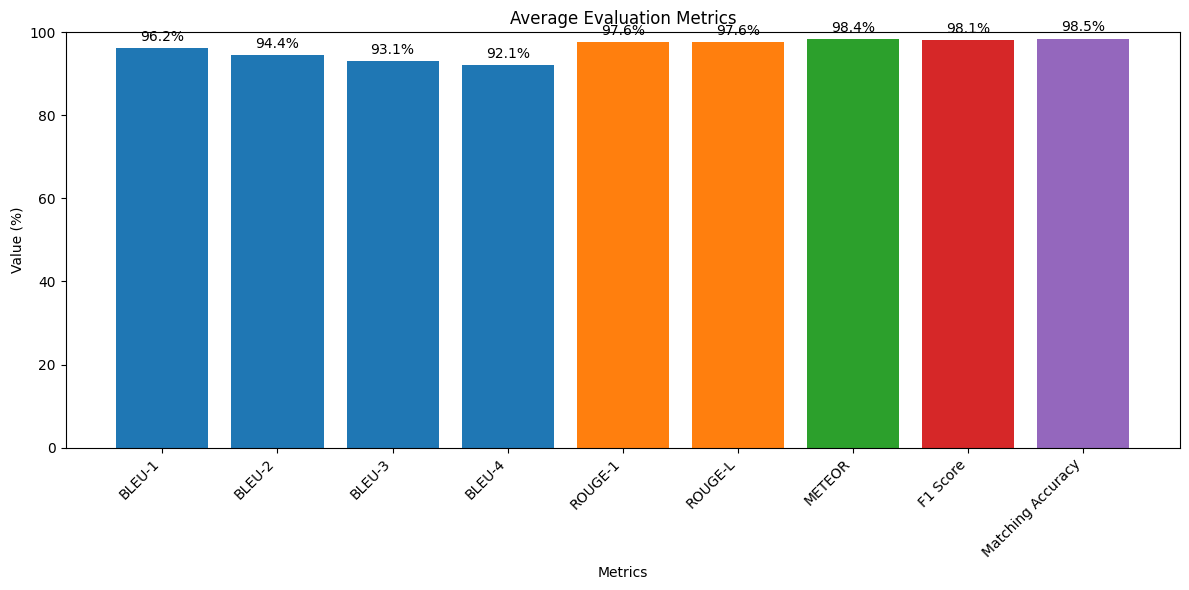

In [14]:

avg_metrics = process_results_folder(results_dir)
save_and_display_metrics(avg_metrics, metrics_dir)